## ZAD1

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist

In [0]:
def fill_hypercube(dimentionality: int, hipersphere_radius: float, points_amount: int):
    return np.random.uniform(low=-hipersphere_radius, high=hipersphere_radius, 
                             size =(points_amount,dimentionality))

def check_points(hipersphere_radius: float, points):
    distance = np.sum(points**2,1)
    inside_points = np.sum(distance<=hipersphere_radius**2)
    outside_points = np.sum(distance>hipersphere_radius**2)
    return (inside_points)/(points.shape[0]), (outside_points)/(points.shape[0])
  

def count_percentages(hipersphere_radius: float, points_amount: int, max_dimentions:int):
  list_proportions = []
  for i in range(1,max_dimentions+1):
    points = fill_hypercube(i, hipersphere_radius, points_amount)
    list_proportions.append((i, check_points(hipersphere_radius, points)))
  return list_proportions  

In [0]:
points_ammount = 200000
hipersphere_radius = 1
max_dimentions = 10
results=[]


for i in range(1, 1000):
  results.append(count_percentages(hipersphere_radius, points_ammount, max_dimentions))
  
    

In [0]:
def extract_vector_of_inside_point_percentage(tuple_list):
  return tuple_list[0][0], np.asarray([x[1][0] for x in tuple_list])*100

In [0]:
def extract_inside_points(results):
  x = []
  y = []
  std = []
  for i in range (0, 10):
    result_list = [x[i] for x in results ]
    dim, vector = extract_vector_of_inside_point_percentage(result_list)
    y.append(np.mean(vector))
    x.append(dim)
    std.append(np.std(vector))
  return x, y, std
  

In [0]:
x, y, std = extract_inside_points(results)

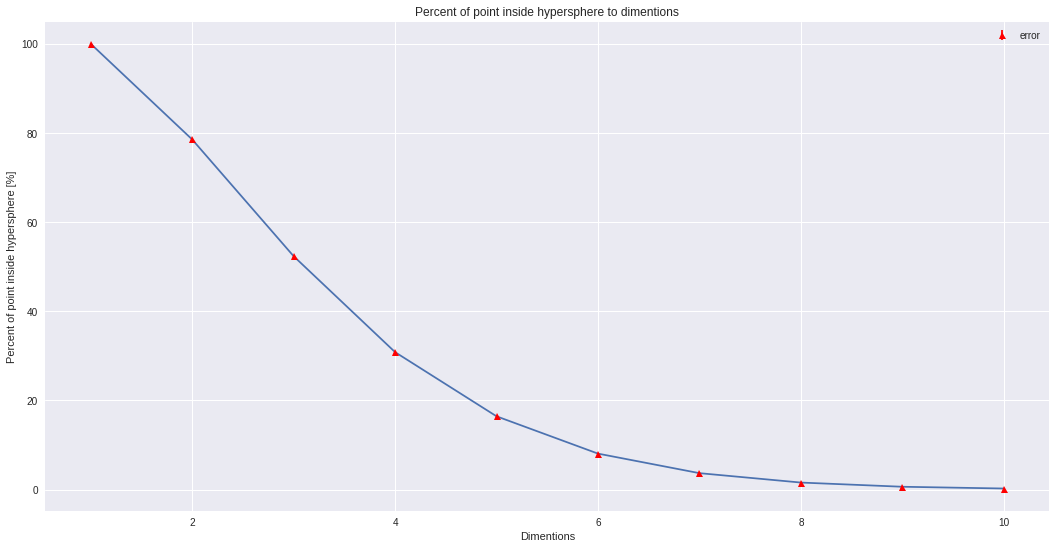

In [7]:
plt.figure(figsize=(18,9))
plt.plot(x,y, '-')
plt.errorbar(x, y,  std, linestyle='None', fmt='^r', label = "error")
plt.xlabel("Dimentions")
plt.ylabel("Percent of point inside hypersphere [%]")
plt.title("Percent of point inside hypersphere to dimentions")
plt.legend()
plt.show()

In [0]:
def extract_vector_of_outside_point_percentage(tuple_list):
  return tuple_list[0][0], np.asarray([x[1][1] for x in tuple_list])*100

In [0]:
def extract_outside_points(results):
  x = []
  y = []
  std = []
  for i in range (0, 10):
    result_list = [x[i] for x in results ]
    dim, vector = extract_vector_of_outside_point_percentage(result_list)
    y.append(np.mean(vector))
    x.append(dim)
    std.append(np.std(vector))
  return x, y, std
  

In [0]:
x, y, std = extract_outside_points(results)

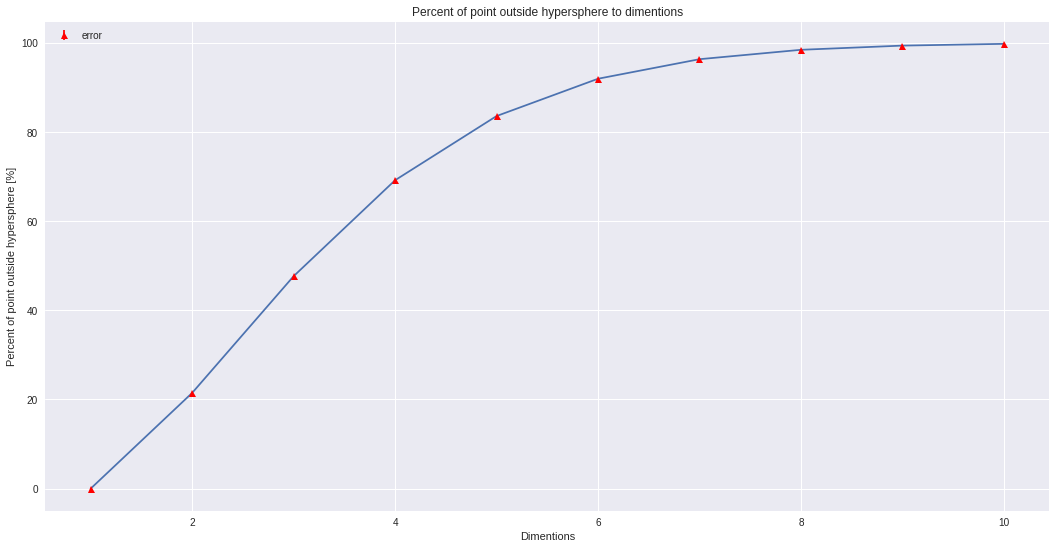

In [11]:
plt.figure(figsize=(18,9))
plt.plot(x,y, '-')
plt.errorbar(x, y,  std, linestyle='None', fmt='^r', label = "error")
plt.xlabel("Dimentions")
plt.ylabel("Percent of point outside hypersphere [%]")
plt.title("Percent of point outside hypersphere to dimentions")
plt.legend()
plt.show()

## ZAD2

In [0]:
def fill_hypercube(dimentionality:int, points_amount:int):
    return np.random.rand(points_amount,dimentionality)
  
def calculate_distance(hypercube):
    a = np.asarray(np.triu(cdist(hypercube, hypercube, 'euclidean'))).ravel()
    return a[np.nonzero(a)]
  
def calculate_proportion(dimenton: int, hypercube):
  calculate_distance(hypercube)
  distances = calculate_distance(hypercube)
  STD = np.std(distances)
  mean = np.mean(distances)
  return STD/mean

def get_proportions(max_dimenton: int, points_amount: int):
  proporions = []
  for dimention in range(1,max_dimenton+1):
    hypercube = fill_hypercube(dimention, points_amount)
    proportion=calculate_proportion(dimention, hypercube)
    proporions.append((dimention,proportion))
  return proporions

In [0]:
points_ammount = 10000
hipersphere_radius = 1
max_dimentions = 10
results2=[]


for i in range(1, 15):
  results2.append(get_proportions(max_dimentions, points_ammount))
  

In [0]:
def extract_vector2(tuple_list):
  return tuple_list[0][0], np.asarray([x[1] for x in tuple_list])

In [0]:
x = []
y = []
std = []
for i in range (0, 9):
  result_list = [x[i] for x in results2 ]
  dim, vector = extract_vector2(result_list)
  y.append(np.mean(vector))
  x.append(dim)
  std.append(np.std(vector))

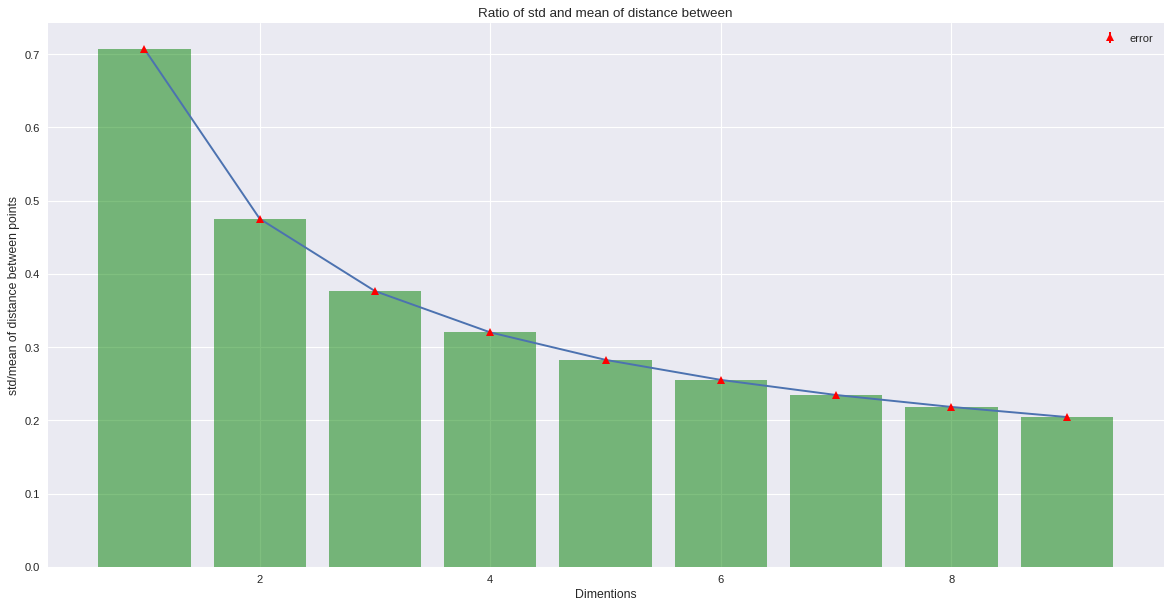

In [16]:
plt.figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
plt.bar(x, y, align = 'center', alpha = 0.5, color = 'green', yerr=std)
plt.plot(x,y, '-')
plt.errorbar(x, y,  std, linestyle='None', fmt='^r', label = "error")
plt.xlabel("Dimentions")
plt.ylabel("std/mean of distance between points")
plt.title("Ratio of std and mean of distance between")
plt.legend()
plt.show()

## ZAD 3

In [0]:
def fill_hypercube(dimentionality, points_amount):
    return np.random.rand(points_amount,dimentionality)

In [0]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0)) * 180/ np.pi

In [0]:
def calculate_angle(points):
  s = np.random.choice(range(1,points.shape[0]), 4, replace=False)
  a1 = points[s[0],:]
  b1 = points[s[1],:] 
  a2 = points[s[2],:]
  b2 = points[s[3],:] 
  v1 = a1 - b1
  v2 = a2 - b2
  return(angle_between(v1, v2))

In [0]:
def get_angles_distribution(points, dim):
  angles = []
  for i in range(1, 100):
    angles.append(calculate_angle(points))
  return angles    
  


In [0]:
points_amount = 200000

dims = [1,2,3,50,500,5000]
angles_list = []
for dim in dims:
  points = fill_hypercube(dim, points_amount)
  angles_list.append(get_angles_distribution(points, dim))

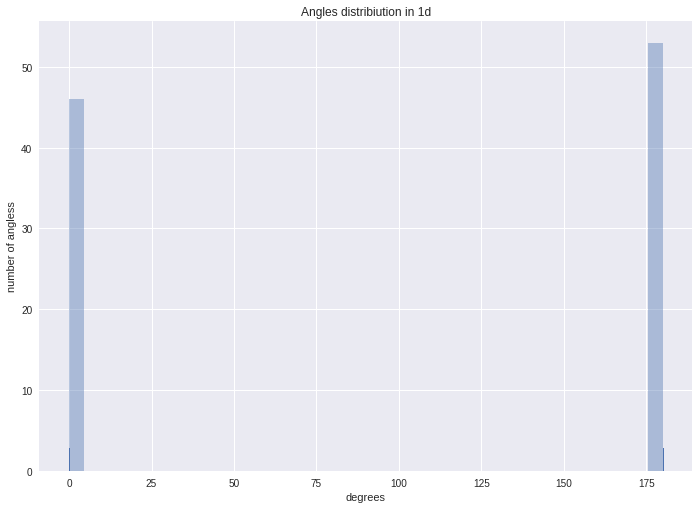

In [30]:
import seaborn as sns

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
x =sns.distplot(angles_list[0], bins=40, kde=False, rug=True, ax =ax)
x.set(xlabel='degrees', ylabel='number of angless')
plt.title("Angles distribiution in 1d")
plt.show()

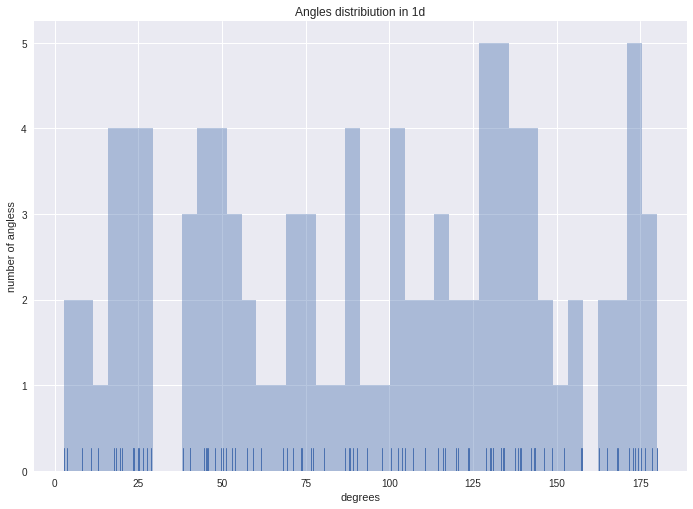

In [31]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
x =sns.distplot(angles_list[1], bins=40, kde=False, rug=True, ax =ax)
x.set(xlabel='degrees', ylabel='number of angless')
plt.title("Angles distribiution in 1d")
plt.show()

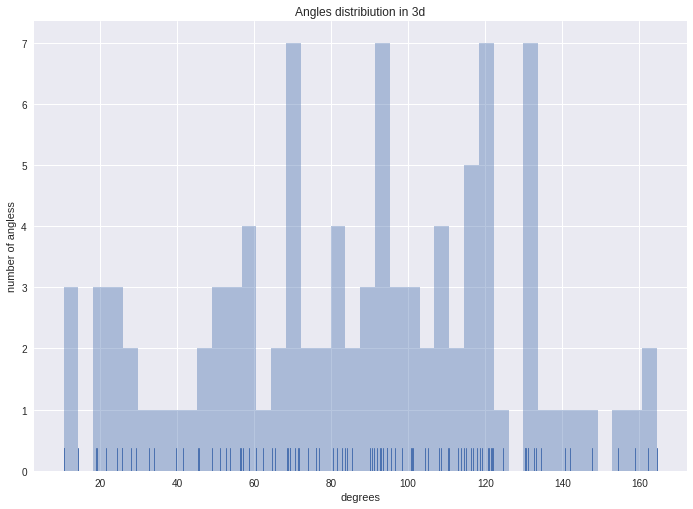

In [32]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
x =sns.distplot(angles_list[2], bins=40, kde=False, rug=True, ax =ax)
x.set(xlabel='degrees', ylabel='number of angless')
plt.title("Angles distribiution in 3d")
plt.show()

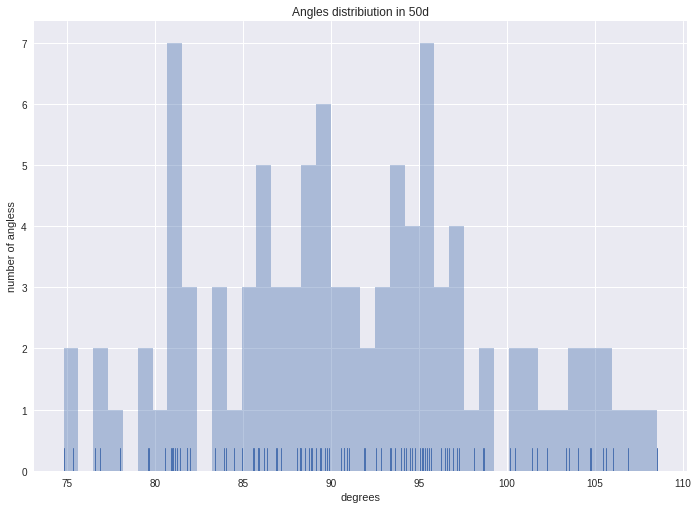

In [33]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
x =sns.distplot(angles_list[3], bins=40, kde=False, rug=True, ax =ax)
x.set(xlabel='degrees', ylabel='number of angless')
plt.title("Angles distribiution in 50d")
plt.show()

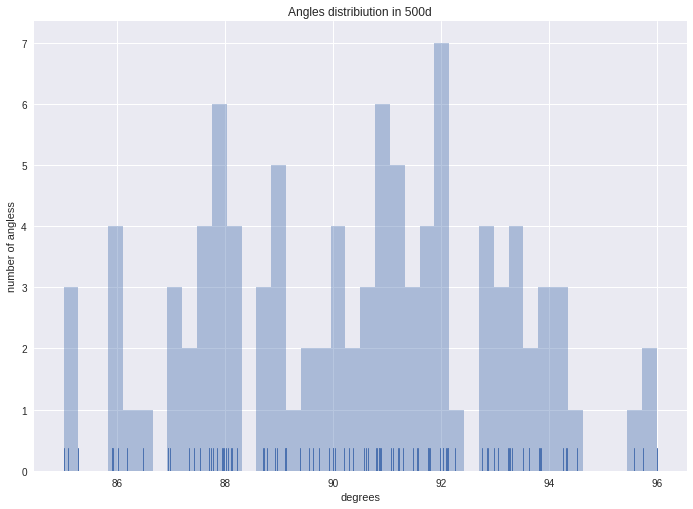

In [34]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
x =sns.distplot(angles_list[4], bins=40, kde=False, rug=True, ax =ax)
x.set(xlabel='degrees', ylabel='number of angless')
plt.title("Angles distribiution in 500d")
plt.show()

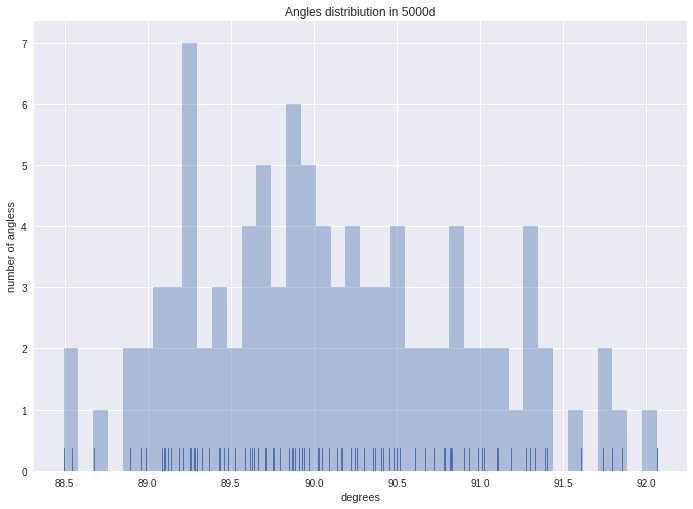

In [35]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
x =sns.distplot(angles_list[5], bins=40, kde=False, rug=True, ax =ax)
x.set(xlabel='degrees', ylabel='number of angless')
plt.title("Angles distribiution in 5000d")
plt.show()